In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df1 = pd.read_csv('c2m.csv')
df2 = pd.read_csv('m2c.csv')
df = pd.concat([df1, df2])
df.head()

,size,time
0,64,0.272694
1,128,0.387925
2,256,0.275391
3,512,0.394371
4,1024,0.281559


In [17]:
# add column for throughput
df['throughput'] = df['time']/df['size']
df.head()

,size,time,throughput
0,64,0.272694,0.004261
1,128,0.387925,0.003031
2,256,0.275391,0.001076
3,512,0.394371,0.000770
4,1024,0.281559,0.000275


In [18]:
averages = df.groupby('size').mean()
averages.head()

,time,throughput
size,,
64,0.515919,0.008061
128,0.520151,0.004064
256,0.505637,0.001975
512,0.426166,0.000832
1024,0.518358,0.000506


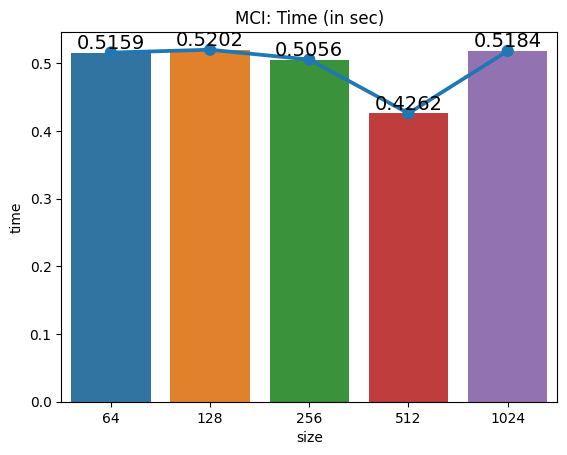

In [19]:
bar = sns.barplot(x=averages.index, y='time', data=averages)
sns.pointplot(x=averages.index, y='time', data=averages)

for i, v in enumerate(averages['time']):
    bar.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=14)

plt.title('MCI: Time (in sec)')
plt.savefig('mci_time.png')

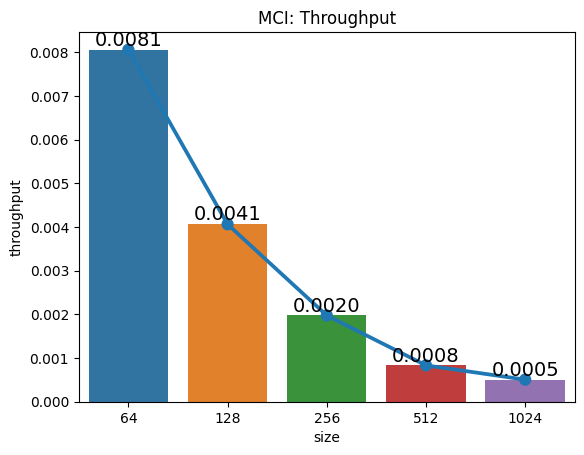

In [20]:
# add lines
bar = sns.barplot(x=averages.index, y='throughput', data=averages)
sns.pointplot(x=averages.index, y='throughput', data=averages)

for i, v in enumerate(averages['throughput']):
    bar.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=14)

plt.title('MCI: Throughput')
plt.savefig('mci_throughput.png')

In [21]:
# plot df each size 